# Homework : Week 2 
## José Moran

In [1]:
%pylab inline
import numpy as np 
import matplotlib.pyplot as plt 

Populating the interactive namespace from numpy and matplotlib


## Part 1

Here, we will do a Metropolis algorithm for a particle in a potential $V(r)=r^4-8r^2$.
It is natural to use the whole potential of python as an object-oriented language and to create an object ( a class) for the particle in the potential. 

In [2]:
def V(p):
    r = np.linalg.norm(p)
    return r**4-8*r**2

class particle(object):
    """A class for the particle in the potential"""
    
    def __init__(self):
        self.position = [0,0]
        
    def radius(self):
        return np.linalg.norm(self.position)
    
    def mcmove(self):
        delta = np.random.rand(2)*2-1.
        rate = np.exp(-(V(self.position+delta)-V(self.position)))
        prob = np.random.rand()
        if rate > prob:
            self.position+=delta
    
    

For our whole simulation, we will do one random walk of $2^{20}$ steps. We will measure the average distance from origin as well as the horizontal coordinate of our particle.

In [3]:
N_data = 2**20
part= particle()
radius = []
x = []

In [4]:
for i in xrange(N_data):
    radius.append(part.radius())
    x.append(part.position[0])
    part.mcmove()

To get rid of the misestimation of the error due to the correlation length of our simulation, we will first measure the error of our two observables using the bunching method. 

In [6]:
radius_copy = list(radius)
x_copy = list(x)

In [7]:
error_r = []
error_x = []

In [8]:
for i in xrange(17):
    error_r.append(np.std(radius_copy)/np.sqrt(len(radius_copy)))
    error_x.append(np.std(x_copy)/np.sqrt(len(x_copy)))
    radius_copy = bunching(radius_copy)
    x_copy = bunching(x_copy)

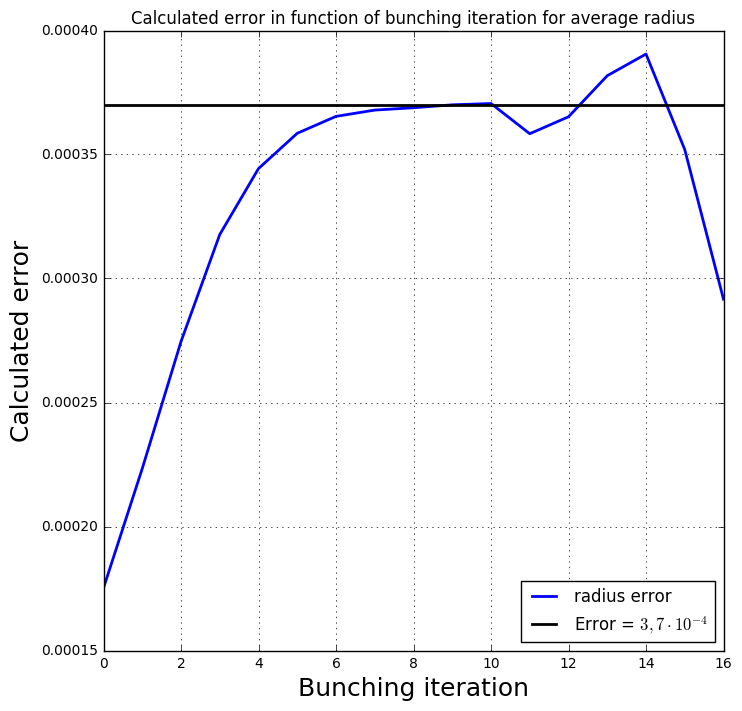

In [9]:
figure = plt.figure(figsize=(8,8))
plt.plot(xrange(17), error_r, ls = '-', lw=2, label = "radius error")
plt.axhline(y=0.00037, xmin=0, xmax=16, lw=2, color = 'k', label = "Error = $3,7\cdot 10^{-4}$")
plt.xlabel("Bunching iteration",fontsize = 18)
plt.ylabel("Calculated error",fontsize = 18)
plt.title("Calculated error in function of bunching iteration for average radius")
plt.legend(loc=4)
plt.grid()
plt.show()
plt.close()

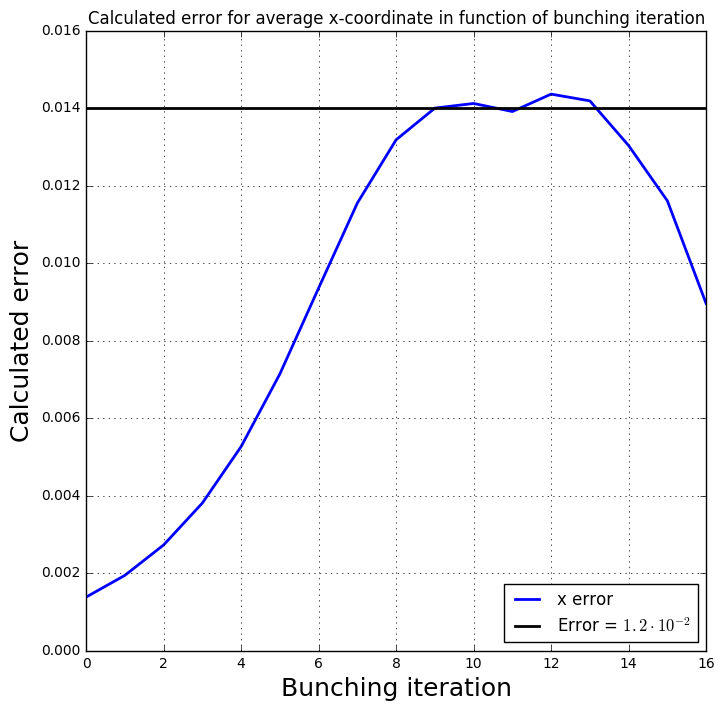

In [21]:
figure = plt.figure(figsize=(8,8))
plt.plot(xrange(17), error_x, ls = '-', lw=2, label = "x error")
plt.axhline(y=0.014, xmin=0, xmax=16, lw=2, color = 'k', label = "Error = $1.2\cdot 10^{-2}$")
plt.xlabel("Bunching iteration",fontsize = 18)
plt.ylabel("Calculated error",fontsize = 18)
plt.title("Calculated error for average x-coordinate in function of bunching iteration")
plt.legend(loc=4)
plt.grid()
plt.show()
plt.close()

It is easy now to see that the measured error is, respectively : 
x error : $1,5\cdot 10^{-2}$
r error : $3,7\cdot 10^{-4}$

However the calculated error varies a lot when we redo our simulation, and there is a lot of statistical noise around the 14th bunching iteration. To have a more stable value for our error, we would have to sample through a much larger number of data.

Observable x seems to have a bigger error than r, this is normal : the mexican hat potential has a rotation symmetry, meaning that the particle is confined in a potential well at a given distance from the origin, but its x coordinate can take a large number of values. We also see that the bunching method takes a bit longer to converge for observable x, hinting that the correlation length for x is larger than for r. 

This is logical : if the proposed monte-carlo move is only along axis x, then the probability that it will be accepted depends on the current position of the particle, because if the particle is near a minimum of the potential, and the minimum is parallel to the x-axis, then we are nearly sure we won't change it's energy by a lot. If the well is perpendicular to the x-axis, it's likely to be rejected.

### Correlation functions

Let us now calculate the correlation functions for the radius and the x observables. We will only calculate a small number of the matrix components, as it goes to 0 rather fast as n grows. 

In [11]:
def correlation(array, n):
    correlation = [np.mean(array*np.roll(array,i)) for i in xrange(n)]
    correlation-= np.mean(array)**2
    return correlation

In [12]:
correlation_radius = correlation(radius,20)
correlation_x = correlation(x,400)

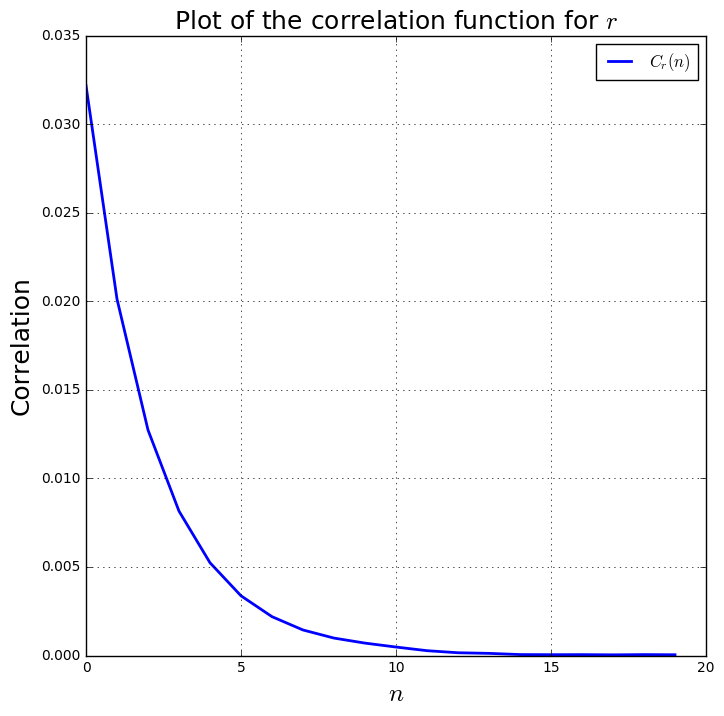

In [13]:
figure = plt.figure(figsize=(8,8))
plt.plot(xrange(len(correlation_radius)), correlation_radius, ls = '-', lw=2, label = "$C_r(n)$")
plt.xlabel("$n$",fontsize = 18)
plt.ylabel("Correlation",fontsize = 18)
plt.title("Plot of the correlation function for $r$",fontsize = 18)
plt.legend()
plt.grid()
plt.show()
plt.close()

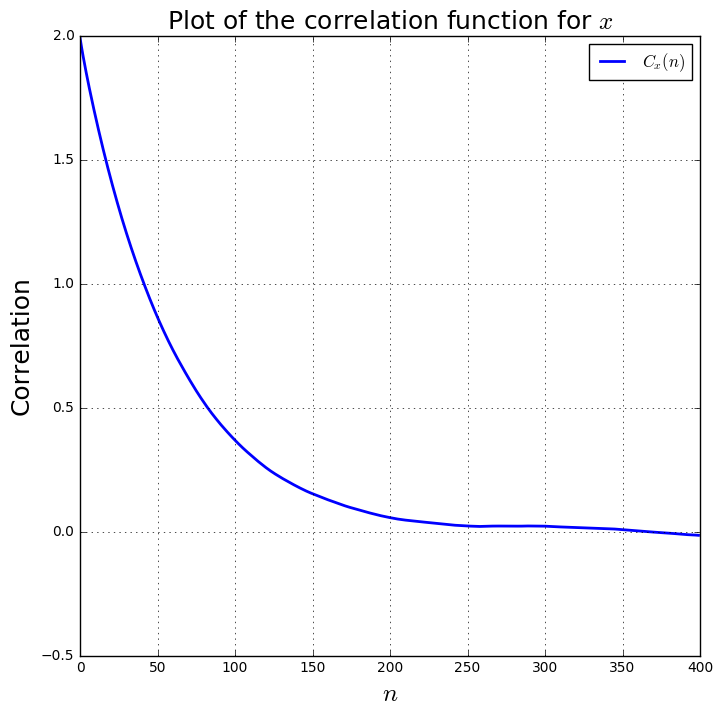

In [14]:
figure = plt.figure(figsize=(8,8))
plt.plot(xrange(len(correlation_x)), correlation_x, ls = '-', lw=2, label = "$C_x(n)$")
plt.xlabel("$n$", fontsize = 18)
plt.ylabel("Correlation", fontsize= 18)
plt.title("Plot of the correlation function for $x$",fontsize = 18)
plt.legend()
plt.grid()
plt.show()
plt.close()

As said before, observable $r$ has a shorter correlation length (under 5) than $x$ (about 100). 
Let's give a more precise estimate of the error, using formula (1) in the homework page.

In [15]:
error_bar_radius = np.sqrt((2*np.sum(correlation_radius)-correlation_radius[0])/N_data)

In [16]:
error_bar_x = np.sqrt((2*np.sum(correlation_x)-correlation_x[0])/N_data)

In [17]:
avg_radius = np.average(radius)
avg_x = np.average(x)

In [18]:
print "Average radius : "+str(avg_radius)+" +/- "+str(error_bar_radius)
print "Average x coordinate : "+str(avg_x)+" +/- "+str(error_bar_x)

Average radius : 1.99204301246 +/- 0.000371385581934
Average x coordinate : 0.0121491867719 +/- 0.0149353918955


As we can see, the error we get with this formula does correspond to the error we estimated using the bunching formula.

This formula simply comes from the generalization of the variance of a sum of random variables. Without loss of generality, and to simplify calculations, let's suppose $\langle \xi_i\rangle = 0 \mbox{ } \forall i$. Then we have that :

$\begin{align*}
\mbox{Var}(\sum_i^N \xi_i) &= \sum_{i,j}\langle \xi_i \xi_j \rangle \\
&= \sum_i^N \langle \xi_i^2 \rangle +\sum_{i\neq j}\langle \xi_i \xi_j\rangle \\
&= N\left(C(0)+2\sum_{i>0}C(i)\right)
\end{align*}$

I don't know if you want a more precise justification. To provide a cleaner justification, we can diagonalize the covariance matrix. In that basis, we have independent random variables and we can apply the result seen in class. Since we must preserve the value of the sum during the basis change, the same goes for the sum of the variance, and we get the result for the error $e$ : 

$e = \sqrt{\frac{\mbox{Var}(\sum \xi)}{N^2}} = \sqrt{\frac{\left(C(0)+2\sum_{i>0}C(i)\right)}{N}}$

## Part II : Importance sampling

### Preliminary : exponential tilting
Let's calculate the likelihood ratio : 

$\begin{align*}
w(x)&=\exp \left( -\frac{1}{2}((x-c)^2-(x-d)^2))\right) \\
&= \exp\left(-\frac{1}{2}(d-c)(2x-(c+d)) \right)
\end{align*}$

And for the two-independent-numbers likelihood ratio we immediately have that : 

$\begin{align*}
w(x_1,x_2)&=w(x_1)w(x_2)\\
&=\exp\left(-\left(\frac{d-c}{2}\right)(2(x_1+x_2)-2(c+d)\right)
\end{align*}$

And it is easy to generalize for the n-independent numbers likelihood ratio : 

$\begin{align*}
w(x_1,x_2,\ldots ,x_n) &= \exp\left(-\left(\frac{d-c}{2}\right)(2\sum_{i=1}^n x_i-n(c+d) \right)
\end{align*}$

For $d=-c$ the ratio simplifies and becomes : 
$\begin{align*}
w(x_1,x_2,\ldots ,x_n) &= \exp\left(2c\sum_{i=1}^n x_i \right)
\end{align*}$

This simplifies because we are sampling variables with mean $d$ and applying a bias towards $-d$. If we understand the mean of the variables $\xi$, it's a drift term in the Brownian motion. Biasing towards $-d$ amounts to applying an effective potential that effectively eliminates the drift we apply, somewhat like applying a friction coefficient that stops our particle from drifting towards high values.

## Importance sampling

We are interested by the brownian motion given by : 

$\left\{\begin{matrix}
x_0 &= b \\ 
x_{t+1} &= x_t+\xi_t \\ 
\langle \xi_t \rangle &= c
\end{matrix}\right.$

And we consider the case where $\xi_t$ are independent variables, distributed according to $p(\xi)\sim \mathcal{N}(c,1)$. 

We want to calculate the average of the observable : 
$A = \left\{ \begin{matrix}
1 &\mbox{ if } x_t \mbox{ becomes negative}\\
0 &\mbox{ otherwise}
\end{matrix}\right.
$
Since a random walk $x$ is entirely defined by $(\xi_0,\xi_1,\ldots,\xi_i,\ldots)$ which are distributed according to p, the average of $A$ is taken with the distribution $p$. 

To do the bias, we use the fact that : 

$\langle A\rangle_p = \langle A w \rangle_q$ 

Where $\langle A \rangle_p$ means that the average is taken according to p, and w is the likelihood ratio between $p$ and $q$. 

Let us now implement this : 

In [21]:
def compute_p(d,b=20, c=0.1):
    sample = []
    x = b 
    while x>= 0:
        xi = np.random.randn()+d
        sample.append(xi)
        x+=xi
    result = np.exp(-(d-c)*np.sum(sample))*np.exp((d-c)*(c+d)*len(sample))
    return result

In [22]:
N_samples = 1000
d_vals = [-0.025,-0.05,-0.075,-0.1,-0.125,-0.15,-0.175]

In [23]:
p = []
for d in d_vals:
    results = []
    for i in xrange(N_samples):
        results.append(compute_p(d))
    p.append(results)

In [24]:
mean_p = [np.mean(p_i) for p_i in p]
error_p = [np.std(p_i) for p_i in p]

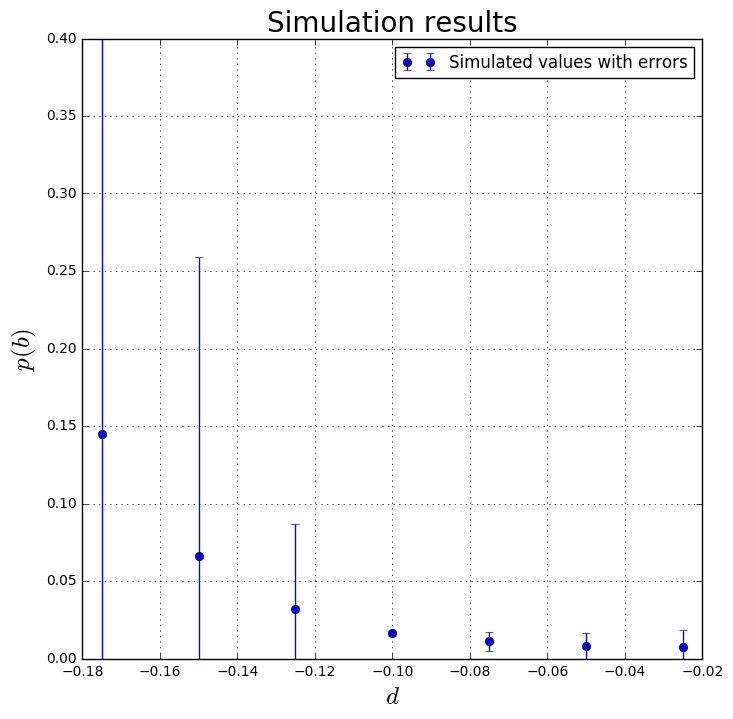

In [37]:
fig = plt.figure(figsize=(8,8))
plt.errorbar(d_vals, mean_p, yerr=error_p, fmt='o', label="Simulated values with errors")
plt.ylim(0.,0.4)
plt.xlabel("$d$", fontsize = 18)
plt.ylabel("$p(b)$",fontsize = 18)
plt.title("Simulation results", fontsize=20)
plt.grid()
plt.legend()
plt.show()
plt.close()

In [40]:
i = argmin(error_p)
print "p(b) = "+str(mean_p[i])+" +/ "+str(error_p[i])

p(b) = 0.0162940754948 +/ 0.0015502913916


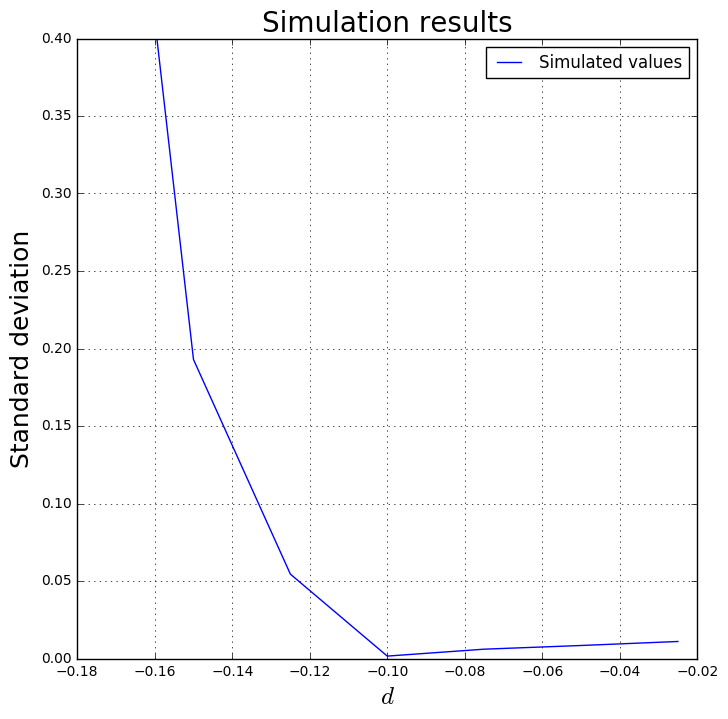

In [38]:
fig = plt.figure(figsize=(8,8))
plt.plot(d_vals, error_p, label="Simulated values")
plt.ylim(0.,0.4)
plt.xlabel("$d$", fontsize = 18)
plt.ylabel("Standard deviation",fontsize = 18)
plt.title("Simulation results", fontsize=20)
plt.grid()
plt.legend()
plt.show()
plt.close()

Here we can see that the standard deviation, that is the error, is minimal for $d=-c$. For values of $d$ higher than $-c$ we get a very high variance : the effective drift is still too high and isn't correctly corrected by the effective potential, and bankrupcy is still a very rare event. For $c=-d$ the drift is corrected and we get a very precise reading on our observable. For lower values of d we still get somewhat precise results, bankruptcy is no more a rare event, because we are drifting towards lower values. However, we still retain an error because of the finite size of the random walks we sample. 